# 0.) Import the Credit Card Fraud Data From CCLE

In [21]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [22]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [23]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [24]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [25]:
df_select=df[["trans_date_trans_time","category","amt","city_pop","is_fraud"]]
df_select["trans_date_trans_time"]=pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"]=[i.second for i in df_select["trans_date_trans_time"]]
X=pd.get_dummies(df_select,["category"]).drop(["trans_date_trans_time","is_fraud"],axis=1)
y=df_select["is_fraud"]
X.head()

<ipython-input-25-8c8abb69a0cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"]=pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-25-8c8abb69a0cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"]=[i.second for i in df_select["trans_date_trans_time"]]


,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,shuffle=True,test_size=0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [29]:
ros=RandomOverSampler(random_state=0)
X_resampled_o,y_resampled_o=ros.fit_resample(X_train,y_train)

In [30]:
rus=RandomUnderSampler(random_state=0)
X_resampled_u,y_resampled_u=rus.fit_resample(X_train,y_train)

In [31]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_resampled_s,y_resampled_s=oversample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
over_log=LogisticRegression().fit(X_resampled_o,y_resampled_o)

In [34]:
under_log=LogisticRegression().fit(X_resampled_u,y_resampled_u)

In [35]:
smote_log=LogisticRegression().fit(X_resampled_s,y_resampled_s)

# 4.) Test the three models

Method1: MSE

In [36]:
over_y_pred=over_log.predict(X_test)
over_MSE=np.sqrt(np.square(np.subtract(y_test,over_y_pred))).mean()

In [37]:
under_y_pred=under_log.predict(X_test)
under_MSE=np.sqrt(np.square(np.subtract(y_test,under_y_pred))).mean()

In [38]:
smote_y_pred=smote_log.predict(X_test)
smote_MSE=np.sqrt(np.square(np.subtract(y_test,smote_y_pred))).mean()

In [39]:
print("Out of sample MSE for oversample: ", over_MSE)
print("Out of sample MSE for undersample: ", under_MSE)
print("Out of sample MSE for SMOTE: ", smote_MSE)

Out of sample MSE for oversample:  0.07223061973655798
Out of sample MSE for undersample:  0.09380623335492694
Out of sample MSE for SMOTE:  0.07213464814414933


Method2: Confusion Matrix and rates

In [40]:
from sklearn.metrics import confusion_matrix
cm_over=confusion_matrix(y_test,over_y_pred)
tn_over,fp_over,fn_over,tp_over=cm_over.ravel()
print("FPR for oversample: ",fp_over/(fp_over+tn_over))
print("FNR for oversample: }",fn_over/(fn_over+tp_over))
print("Accuracy for oversample: ",over_log.score(X_test, y_test))
cm_over

FPR for oversample:  0.07138985255854294
FNR for oversample: } 0.27631578947368424
Accuracy for oversample:  0.927769380263442


array([[154179,  11853],
       [   189,    495]])

In [41]:
cm_under=confusion_matrix(y_test,under_y_pred)
tn_under,fp_under,fn_under,tp_under=cm_under.ravel()
print("FPR for undersample: ",fp_under/(fp_under+tn_under))
print("FNR for undersample: ",fn_under/(fn_under+tp_under))
print("Accuracy for undersample: ",under_log.score(X_test, y_test))
cm_under

FPR for undersample:  0.0930362821624747
FNR for undersample:  0.2807017543859649
Accuracy for undersample:  0.906193766645073


array([[150585,  15447],
       [   192,    492]])

In [42]:
cm_smote=confusion_matrix(y_test,smote_y_pred)
tn_smote,fp_smote,fn_smote,tp_smote=cm_smote.ravel()
print("FPR for smote: ",fp_smote/(fp_smote+tn_smote))
print("FNR for smote: ",fn_smote/(fn_smote+tp_smote))
print("Accuracy for smote: ",smote_log.score(X_test, y_test))
cm_smote

FPR for smote:  0.07129348559313867
FNR for smote:  0.27631578947368424
Accuracy for smote:  0.9278653518558506


array([[154195,  11837],
       [   189,    495]])

# 5.) Which performed best in Out of Sample metrics?

From the MSE, accuracy and false negative rate for these 3 samples, the SMOTE performs the best with lowest MSE (0.07213464814414933), lowest FNR ( 0.27631578947368424) and highest accuracy (0.9278653518558506).

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [43]:
import matplotlib.pyplot as plt
OG_data_temp=pd.DataFrame(X_train[:,0:2],columns=["amt","city_pop"])
y_train.index=[i for i in range(len(y_train))]
OG_data_temp["is_fraud"]=y_train

In [44]:
OG_data_temp1=pd.DataFrame(X_resampled_s[:,0:2],columns=["amt","city_pop"])
y_resampled_s.index=[i for i in range(len(y_resampled_s))]
OG_data_temp1["is_fraud"]=y_resampled_s

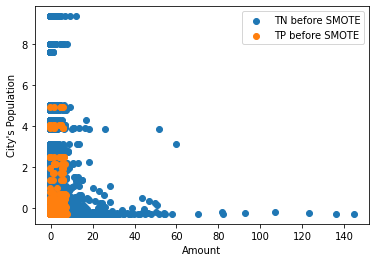

In [45]:
plt.scatter(OG_data_temp[OG_data_temp["is_fraud"]==0]["amt"],OG_data_temp[OG_data_temp["is_fraud"]==0]["city_pop"],label="TN before SMOTE")
plt.scatter(OG_data_temp[OG_data_temp["is_fraud"]==1]["amt"],OG_data_temp[OG_data_temp["is_fraud"]==1]["city_pop"],label="TP before SMOTE")
plt.xlabel("Amount")
plt.ylabel("City's Population")
plt.legend()
plt.show()

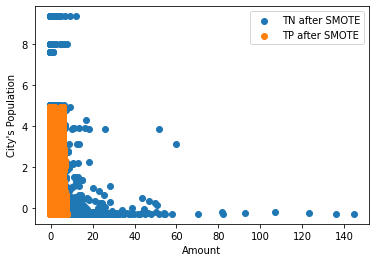

In [46]:
plt.scatter(OG_data_temp1[OG_data_temp1["is_fraud"]==0]["amt"],OG_data_temp1[OG_data_temp1["is_fraud"]==0]["city_pop"],label="TN after SMOTE")
plt.scatter(OG_data_temp1[OG_data_temp1["is_fraud"]==1]["amt"],OG_data_temp1[OG_data_temp1["is_fraud"]==1]["city_pop"],label="TP after SMOTE")
plt.xlabel("Amount")
plt.ylabel("City's Population")
plt.legend()
plt.show()